### Question B, subquestion 3 (B3)

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pickle


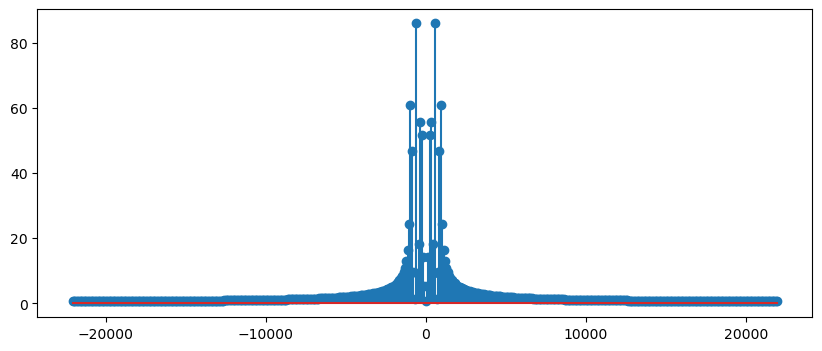

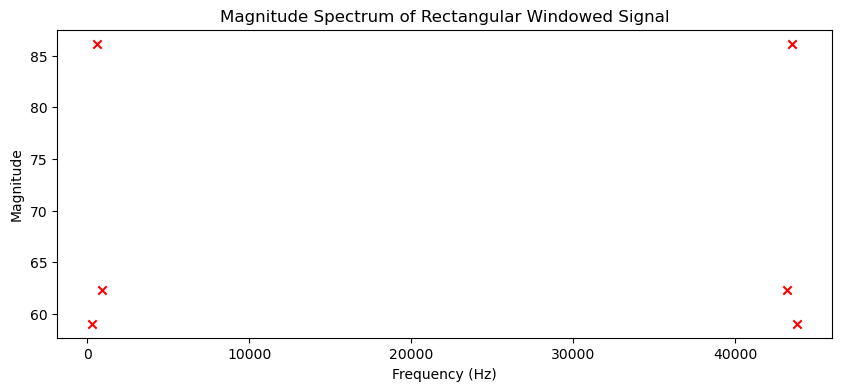

In [2]:
# In this code cell, we will use the parabolic interpolation method to estimate the peak frequencies more accurately than before
# For a proper comparison, we will be using the peak locations (locs) and values (pks) of the magnitude spectrum that we found in the previous code cell
# After performing parabolic interpolation on each peak, we will store respective amplitude - frequency pairs in a list, just like before

# We import the previously stored variables from the pickle file
with open('variables.pickle', 'rb') as f:
    saved_variables = pickle.load(f)

# We access the variables
fs = saved_variables['fs']
fk = saved_variables['fk']
locs = saved_variables['locs']
magnitude_spectrum = saved_variables['magnitude_spectrum']
magnitude_spectrum_flat = saved_variables['magnitude_spectrum_flat']
N = saved_variables['N']
amplitude_frequency_pairs = saved_variables['amplitude_frequency_pairs']
freq_axis = saved_variables['freq_axis']


# We start by initializing an empty list to store the amplitude - frequency pairs of the peaks
amplitude_frequency_pairs_parabolic = []

# We, now, perform parabolic interpolation on each peak to estimate the peak frequency more accurately
# Since parabolic interpolation requires 3 points to find local maximum, we will use the peak location
# and its two neighboring points to perform the interpolation
for loc in locs:
    # We get the 3 points for parabolic interpolation
    b = loc  # Index of the peak
    a = max(b - 1, 0)  # Index of the point to the left of the peak (if it exceeds the bounds of the array, we set it to 0) 
    c = min(b + 1, len(magnitude_spectrum_flat) - 1)  # Index of the point to the right of the peak (if it exceeds the bounds of the array, we set it to the last index)
    
    # We, now, get the magnitudes of the 3 points
    fa = magnitude_spectrum_flat[a]
    fb = magnitude_spectrum_flat[b]
    fc = magnitude_spectrum_flat[c]
    
    # And, then, use the parabolic interpolation formula to estimate the peak frequency using the 3 points, as such: 
    
    # We calculate the interpolated peak location (bin) first
    interpolated_loc = 0.5 * (fa - fc) / (fa - 2 * fb + fc)
    
    # We, then, calculate the magnitude of the interpolated peak location
    interpolated_mag = fb - 0.25 * (fa - fc) * interpolated_loc
    
    # We get the interpolated frequency of the peak using the formula fk = k * fs / N
    interpolated_freq = (loc + interpolated_loc) * fs / N
    
    # And we, finally, append the amplitude - frequency pair to the list
    amplitude_frequency_pairs_parabolic.append(interpolated_mag)
    amplitude_frequency_pairs_parabolic.append(interpolated_freq)


# We, now, print the amplitude - frequency pairs obtained using parabolic interpolation
# print("\nAmplitude - Frequency pairs obtained WITH parabolic interpolation:\n", amplitude_frequency_pairs_parabolic)

# To estimate whether the result improve or not, we print the previously obtained amplitude - frequency pairs
# print("\nAmplitude - Frequency pairs obtained WITHOUT parabolic interpolation:\n", amplitude_frequency_pairs)

# We, optionally, plot the magnitude spectrum of the originally rectangular windowed signal, as well as and the interpolated signal
plt.figure(figsize = (10, 4))

plt.stem(freq_axis, magnitude_spectrum, label = 'Magnitude Spectrum of Windowed Signal')

# We, now, plot the peak frequencies of the interpolated signal
plt.figure(figsize = (10, 4))
plt.scatter(amplitude_frequency_pairs_parabolic[1::2], amplitude_frequency_pairs_parabolic[::2], color = 'red', marker = 'x', label = 'Estimated Peaks using Parabolic Interpolation)') 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Rectangular Windowed Signal')
plt.show()

# Saving the frequency pairs list to a pickle file
saved_variables.update({
    'amplitude_frequency_pairs_parabolic': amplitude_frequency_pairs_parabolic
})

with open('variables.pickle', 'wb') as f:
    pickle.dump(saved_variables, f)


# NOTE: We can see that the amplitude - frequency pairs obtained using parabolic interpolation are more accurate than the ones obtained without it.
# In general, parabolic interpolation provides a more accurate estimation of the peak frequency than simply taking the peak location, because it 
# takes into account the magnitudes of the neighboring points, and does not average the values like the previously applied DFT does.
# Therefore, parabolic interpolation is a useful technique to improve the accuracy of peak frequency estimation in spectral analysis, reducing the effect of spectral leakage.

# We clearly see that the second peak is significantly higher than the first and third peak in the magnitude spectrum of the signal (whether we check the positive or negative frequencies).
# It's not clear why the second peak is higher than the other peaks, but it could be due to the fact that the second harmonic has a higher amplitude than the other harmonics in the synthesized signal.
# Another reason could be that the second harmonic is closer to the center frequency of the DFT, which is the DC component (0 Hz), and the DFT is more sensitive to frequencies closer to the center frequency.
# This makes the second peak more prominent in the magnitude spectrum, as well as the fact that the DFT is not able to perfectly represent the synthesized signal in the frequency domain, due to spectral leakage.
# This is, probably, why the second peak is higher than the other peaks in the magnitude spectrum of the signal, but there are multiple factors to consider.
